In [1]:
#DATASET FOR CLASSIFYING INTO DOH AND NON-DOH TRAFFIC
from google.colab import files
uploaded = files.upload()

Saving merge_first_layer.csv to merge_first_layer.csv


In [2]:
import io
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
d=pd.read_csv(io.BytesIO(uploaded['merge_first_layer.csv']))
print(d.head(5))

         SourceIP   DestinationIP  ...  ResponseTimeTimeCoefficientofVariation   DoH
0  192.168.20.205         1.1.1.1  ...                                3.696794  True
1         1.1.1.1  192.168.20.205  ...                               11.584352  True
2         1.1.1.1  192.168.20.205  ...                                1.667649  True
3         1.1.1.1  192.168.20.205  ...                                7.495443  True
4         1.1.1.1  192.168.20.205  ...                                4.263847  True

[5 rows x 35 columns]


In [3]:
d.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,192.168.20.205,1.1.1.1,55268,443,2020-04-01 10:08:49,120.892863,39956,330.507517,70650,584.401744,12444.750192,111.556041,124.696731,87.0,87,1.013752,0.337917,0.894619,1006.354700,31.723094,64.038706,65.290486,0.0,-0.118379,2.018678,0.495374,4.355913e-01,0.659993,0.178531,0.002307,0.000011,0.801027,0.270488,3.696794,True
1,1.1.1.1,192.168.20.205,443,55268,2020-04-01 10:10:50,120.639963,79416,658.289327,46755,387.558143,8069.990051,89.833123,121.318269,87.0,87,1.146067,0.382022,0.740475,1207.867179,34.754384,56.606672,55.776013,0.0,0.071702,1.628764,0.613963,7.434583e-06,0.002727,0.000235,0.000031,0.000026,0.224312,0.076788,11.584352,True
2,1.1.1.1,192.168.20.205,443,55268,2020-04-01 10:12:51,120.690013,77836,644.924945,46200,382.798865,9645.935043,98.213721,123.173784,87.0,87,1.104951,0.368317,0.797359,1239.247254,35.202944,56.870347,55.783910,0.0,0.092586,1.615500,0.619003,4.627758e-09,0.000068,0.000041,0.000032,0.000020,0.387748,0.305648,1.667649,True
3,1.1.1.1,192.168.20.205,443,55268,2020-04-01 10:14:52,120.673598,78497,650.490259,46742,387.342391,13338.264242,115.491403,128.318648,87.0,87,1.073292,0.357764,0.900036,1229.896364,35.069878,57.463287,55.806157,0.0,0.141757,1.638537,0.610301,6.325814e-07,0.000795,0.000106,0.000038,0.000019,0.256910,0.109526,7.495443,True
4,1.1.1.1,192.168.20.205,443,55268,2020-04-01 10:16:52,120.681791,78652,651.730467,46294,383.603853,8396.058692,91.630010,121.779727,87.0,87,1.138701,0.379567,0.752424,1187.558994,34.460978,57.010015,55.808215,0.0,0.104623,1.654335,0.604472,9.639035e-08,0.000310,0.000073,0.000033,0.000021,0.384717,0.166890,4.263847,True


In [4]:
d.dtypes

SourceIP                                   object
DestinationIP                              object
SourcePort                                  int64
DestinationPort                             int64
TimeStamp                                  object
Duration                                  float64
FlowBytesSent                               int64
FlowSentRate                              float64
FlowBytesReceived                           int64
FlowReceivedRate                          float64
PacketLengthVariance                      float64
PacketLengthStandardDeviation             float64
PacketLengthMean                          float64
PacketLengthMedian                        float64
PacketLengthMode                            int64
PacketLengthSkewFromMedian                float64
PacketLengthSkewFromMode                  float64
PacketLengthCoefficientofVariation        float64
PacketTimeVariance                        float64
PacketTimeStandardDeviation               float64


In [5]:
d=d.dropna(axis=1, how='all')
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SourceIP                                49 non-null     object 
 1   DestinationIP                           49 non-null     object 
 2   SourcePort                              49 non-null     int64  
 3   DestinationPort                         49 non-null     int64  
 4   TimeStamp                               49 non-null     object 
 5   Duration                                49 non-null     float64
 6   FlowBytesSent                           49 non-null     int64  
 7   FlowSentRate                            49 non-null     float64
 8   FlowBytesReceived                       49 non-null     int64  
 9   FlowReceivedRate                        49 non-null     float64
 10  PacketLengthVariance                    49 non-null     float64


In [6]:
#NUMERICAL ENCODING
d["SourceIP"] = d["SourceIP"].astype('category')
d["SourceIP"] = d["SourceIP"].cat.codes
d["DestinationIP"] = d["DestinationIP"].astype('category')
d["DestinationIP"] = d["DestinationIP"].cat.codes
d["TimeStamp"] = d["TimeStamp"].astype('category')
d["TimeStamp"] = d["TimeStamp"].cat.codes
d["DoH"] = d["DoH"].astype('category')
d["DoH"] = d["DoH"].cat.codes
d.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,5,0,55268,443,23,120.892863,39956,330.507517,70650,584.401744,12444.750192,111.556041,124.696731,87.0,87,1.013752,0.337917,0.894619,1006.354700,31.723094,64.038706,65.290486,0.0,-0.118379,2.018678,0.495374,4.355913e-01,0.659993,0.178531,0.002307,0.000011,0.801027,0.270488,3.696794,1
1,0,11,443,55268,24,120.639963,79416,658.289327,46755,387.558143,8069.990051,89.833123,121.318269,87.0,87,1.146067,0.382022,0.740475,1207.867179,34.754384,56.606672,55.776013,0.0,0.071702,1.628764,0.613963,7.434583e-06,0.002727,0.000235,0.000031,0.000026,0.224312,0.076788,11.584352,1
2,0,11,443,55268,25,120.690013,77836,644.924945,46200,382.798865,9645.935043,98.213721,123.173784,87.0,87,1.104951,0.368317,0.797359,1239.247254,35.202944,56.870347,55.783910,0.0,0.092586,1.615500,0.619003,4.627758e-09,0.000068,0.000041,0.000032,0.000020,0.387748,0.305648,1.667649,1
3,0,11,443,55268,26,120.673598,78497,650.490259,46742,387.342391,13338.264242,115.491403,128.318648,87.0,87,1.073292,0.357764,0.900036,1229.896364,35.069878,57.463287,55.806157,0.0,0.141757,1.638537,0.610301,6.325814e-07,0.000795,0.000106,0.000038,0.000019,0.256910,0.109526,7.495443,1
4,0,11,443,55268,27,120.681791,78652,651.730467,46294,383.603853,8396.058692,91.630010,121.779727,87.0,87,1.138701,0.379567,0.752424,1187.558994,34.460978,57.010015,55.808215,0.0,0.104623,1.654335,0.604472,9.639035e-08,0.000310,0.000073,0.000033,0.000021,0.384717,0.166890,4.263847,1


In [7]:
#SPLITTING DATASET INTO INDEPENDENT AND DEPENDENT VARIABLES
np.set_printoptions(suppress=True)
X=d.iloc[:,:-1].values
Y=d.iloc[:,-1].values

#SPLITTING DATASET INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.3)
X_test[0]

array([      2.        ,      19.        ,   53154.        ,
           443.        ,       1.        ,       0.803995  ,
          2574.        ,    3201.51244722,   20438.        ,
         25420.55609799, 1182660.16161616,    1087.50179844,
           697.33333333,      78.        ,      66.        ,
             1.70850292,       0.58053544,       1.55951501,
             0.04479052,       0.21163771,       0.27466933,
             0.255459  ,       0.        ,       0.2723097 ,
             1.29782795,       0.77051816,       0.00019841,
             0.01408584,       0.0184715 ,       0.0268385 ,
             0.001771  ,      -1.78200176,       1.1856229 ,
             0.76257178])

In [8]:
d = d.fillna(d.mean())

In [9]:
ACCURACY_SCORE={}

In [10]:
#Information gain 
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="entropy")
y_pred_IG=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_IG)

[0 1 0 1 1 0 0 1 1 1 0 0 1 1 1]


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_IG))
print(accuracy_score(y_test,y_pred_IG)*100)
print(classification_report(y_test,y_pred_IG))

[[6 1]
 [0 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [12]:
ACCURACY_SCORE['INFORMATION GAIN']=accuracy_score(y_test,y_pred_IG)*100

In [13]:
#GINI INDEX
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini")
y_pred_GINI=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_GINI)

[0 1 0 1 1 0 0 1 1 0 0 0 1 1 1]


In [14]:
print(confusion_matrix(y_test,y_pred_GINI))
print(accuracy_score(y_test,y_pred_GINI)*100)
print(classification_report(y_test,y_pred_GINI))

[[6 1]
 [1 7]]
86.66666666666667
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



[Text(200.88000000000002, 190.26, 'X[20] <= 10.382\ngini = 0.483\nsamples = 49\nvalue = [20, 29]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 17.5\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[26] <= 0.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]')]

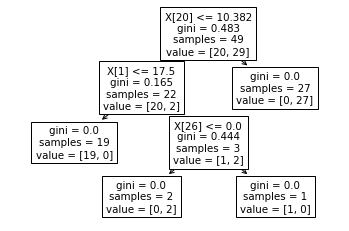

In [15]:
from sklearn import tree
tr=tree.DecisionTreeClassifier()
tr.fit(X,Y)
tree.plot_tree(tr)

In [16]:
ACCURACY_SCORE['GINI INDEX']=accuracy_score(y_test,y_pred_GINI)*100

In [17]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)
y_pred_RF=clf.predict(X_test)
print(y_pred_RF)

[0 1 0 1 1 0 0 1 0 1 0 0 1 1 1]


In [18]:
y_pred_cat=[]
for x in y_pred_RF:
  if x==1:
    y_pred_cat.append("True")
  else :
    y_pred_cat.append("False")
y_pred_cat

['False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True']

In [19]:
print(confusion_matrix(y_test,y_pred_RF))
print(accuracy_score(y_test,y_pred_RF)*100)
print(classification_report(y_test,y_pred_RF))

[[7 0]
 [0 8]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [20]:
ACCURACY_SCORE['Random Forest']=accuracy_score(y_test,y_pred_RF)*100

In [21]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
y_pred_NB=gnb.fit(X_train,y_train).predict(X_test)
print(y_pred_NB)

[0 1 0 1 1 0 0 1 1 1 0 0 1 1 1]


In [22]:
print(confusion_matrix(y_test,y_pred_NB))
print(accuracy_score(y_test,y_pred_NB)*100)
print(classification_report(y_test,y_pred_NB))

[[6 1]
 [0 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [23]:
ACCURACY_SCORE['Naive bayes']=accuracy_score(y_test,y_pred_NB)*100

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=7)
y_pred_KNN=knn.fit(X_train,y_train).predict(X_test)
print(y_pred_KNN)

[0 1 0 1 1 0 0 1 1 1 0 0 1 1 1]


In [25]:
print(confusion_matrix(y_test,y_pred_KNN))
print(accuracy_score(y_test,y_pred_KNN)*100)
print(classification_report(y_test,y_pred_KNN))

[[6 1]
 [0 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [26]:
ACCURACY_SCORE['KNN']=accuracy_score(y_test,y_pred_KNN)*100

In [27]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
lr_rate= 0.5
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=lr_rate, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_GB=gb_clf.predict(X_test)
print(y_pred_GB)

[0 1 0 1 1 0 0 1 1 1 0 0 1 1 1]


In [28]:
print(confusion_matrix(y_test,y_pred_GB))
print(accuracy_score(y_test,y_pred_GB)*100)
print(classification_report(y_test,y_pred_GB))

[[6 1]
 [0 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [29]:
ACCURACY_SCORE['GRADIENT BOOST']=accuracy_score(y_test,y_pred_GB)*100
print(ACCURACY_SCORE)

{'INFORMATION GAIN': 93.33333333333333, 'GINI INDEX': 86.66666666666667, 'Random Forest': 100.0, 'Naive bayes': 93.33333333333333, 'KNN': 93.33333333333333, 'GRADIENT BOOST': 93.33333333333333}
